In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Given parameters
n = 50  # Sample size
sigma_squared = 1  # Variance of the noise
np.random.seed(0)  # For reproducibility


In [3]:
# Generate sample data
X = np.random.normal(0, 1, n)  # Xi ~ N(0,1)
epsilon = np.random.normal(0, np.sqrt(sigma_squared), n)  # εi ~ N(0, σ^2)
Y = X + epsilon  # Yi = Xi + εi


In [4]:
# Define quadratic loss function
def quadratic_loss(a, X, Y):
    return np.mean((a * X - Y) ** 2)


In [9]:
# Compute argmin and min of the population and empirical risk
a_values = np.linspace(-2, 2, 400)  # Range of parameter a
empirical_risks = [quadratic_loss(a, X, Y) for a in a_values]
a_min_empirical = a_values[np.argmin(empirical_risks)]
min_empirical_risk = min(empirical_risks)

# For population risk, under the assumption that the true parameter is 1 (since not specified)
# Here, it should ideally be derived from a formula based on the distribution of X and Y
population_risks = [(a - 1) ** 2 for a in a_values]  # Simplified example, modify as necessary
a_min_population = a_values[np.argmin(population_risks)]
min_population_risk = min(population_risks)

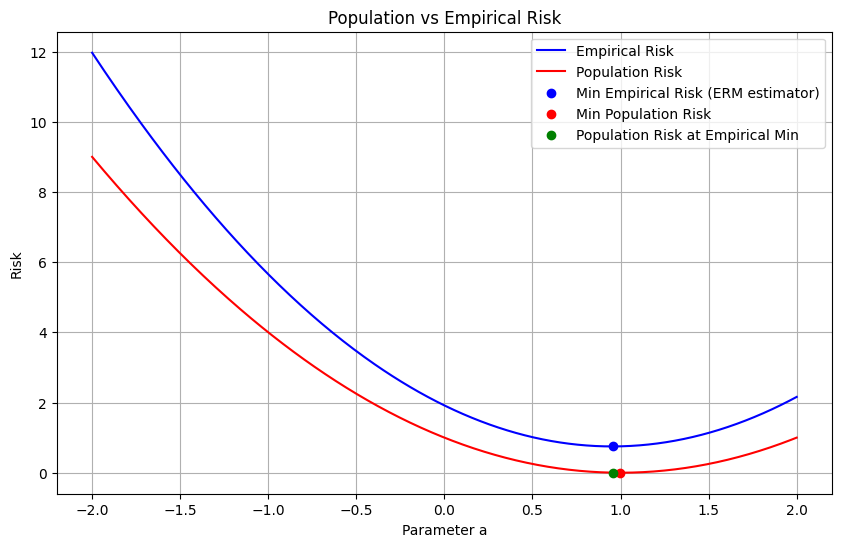

In [10]:
# Compute the population risk at the point minimizing the empirical risk
population_risk_at_empirical_min = (a_min_empirical - 1) ** 2  # Simplified example

# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(a_values, empirical_risks, label='Empirical Risk', color='blue')
plt.plot(a_values, population_risks, label='Population Risk', color='red')
plt.scatter([a_min_empirical], [min_empirical_risk], color='blue', zorder=5, label='Min Empirical Risk (ERM estimator)')
plt.scatter([a_min_population], [min_population_risk], color='red', zorder=5, label='Min Population Risk')
plt.scatter([a_min_empirical], [population_risk_at_empirical_min], color='green', zorder=5, label='Population Risk at Empirical Min')
plt.xlabel('Parameter a')
plt.ylabel('Risk')
plt.title('Population vs Empirical Risk')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
# Constants
L = 200  # Number of iterations for estimating unconditional excess risk
sample_sizes = [10, 30, 50, 100, 200]  # Different sample sizes to analyze
sigma_squared = 1  # Assumed variance of the noise


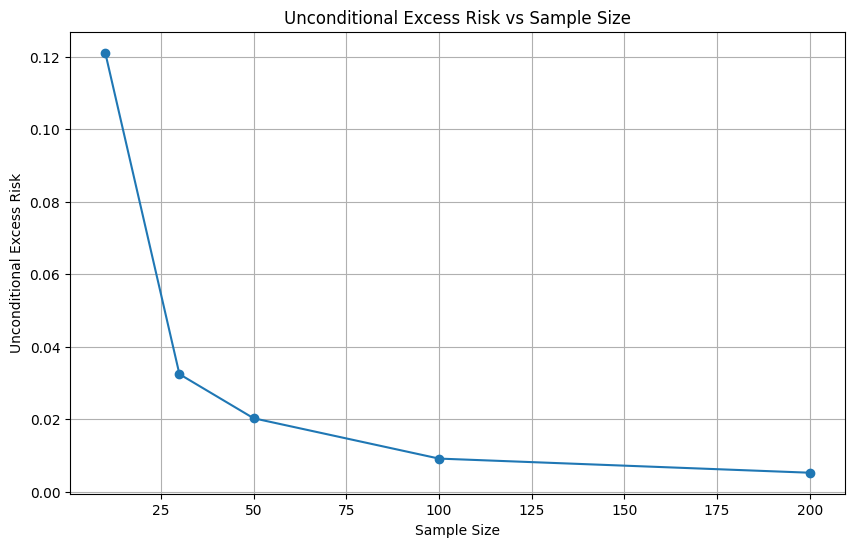

In [15]:
def erm_estimator(X, Y):
    # Empirical Risk Minimizer for linear case
    return np.dot(X, Y) / np.dot(X, X)

def generate_sample(n):
    # Generate sample data
    X = np.random.normal(0, 1, n)
    epsilon = np.random.normal(0, np.sqrt(sigma_squared), n)
    Y = X + epsilon
    return X, Y

# Initialize list to store unconditional excess risks for different sample sizes
unconditional_excess_risks = []

# Compute unconditional excess risk for different sample sizes
for n in sample_sizes:
    excess_risks = []
    for _ in range(L):
        X, Y = generate_sample(n)
        a_hat = erm_estimator(X, Y)
        empirical_risk = quadratic_loss(a_hat, X, Y)
        population_risk_at_a_hat = (a_hat - 1) ** 2 + 1  # Assuming true parameter is 1
        excess_risk = population_risk_at_a_hat - min([(a - 1) ** 2 + 1 for a in np.linspace(-2, 2, 400)] )  # Excess risk computation
        excess_risks.append(excess_risk)
    # Average the excess risks for the current sample size
    unconditional_excess_risks.append(np.mean(excess_risks))

# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, unconditional_excess_risks, marker='o', linestyle='-')
plt.xlabel('Sample Size')
plt.ylabel('Unconditional Excess Risk')
plt.title('Unconditional Excess Risk vs Sample Size')
plt.grid(True)
plt.show()